# Wednesday, Week 1
# Astrochemistry Activity


Now that you have learned a little about how astronomers detect and characterize molecules in space, you will get a chance to identify and ‘discover’ new molecules for yourself using a real astrophysical dataset! We will first take a look at the spectrum of an intermediate-mass protostar taken with a radio telescope.

__Molecules around Protostars:__

Protostars, as the name suggests, are very young stars that are still gathering mass from their parent molecular clouds. The protostellar phase represents one of the earliest phase in stellar evolution and for a Sun-like protostar, this phase lasts around 500,000 years. Astronomers want to better understand the chemical composition of the gas around these young stars, as the chemical complexity (or lack thereof) is directly relevant to questions of origins of life. Planets will ultimately form around these young stars and their atmospheres and compositions will, at least in part, be determined by the initial chemistry present in the protostellar phase.

__Protostellar Spectrum:__

Plot and inspect the observed spectrum of the intermediate-mass protostar NGC 7129 FIRS 2 using the plotSpectra function() provide below. Please don't worry about the details of the data loading and plotting right now (but this is all something you will know how to do by the end of this class!).

In [9]:
# Importing some helpful libaries
import numpy as np
import matplotlib.pyplot as plt

# Helper plotting function
def plotSpectra(dataPath, idLines=False):
    # load in the data
    X = np.genfromtxt(dataPath+'Protostar.csv', delimiter=',', usecols=0)
    Y = np.genfromtxt(dataPath+'Protostar.csv', delimiter=',', usecols=1)

    # plot the data
    plt.figure(figsize=(12, 4))
    plt.step(X, Y, c='k')
    plt.xlabel('Freq [GHz]')
    plt.ylabel('Intensity [K]')
    plt.xlim([min(X), max(X)])
    plt.minorticks_on()
    plt.tight_layout()
    
    # plot lines to id
    if idLines:
        plt.axvspan(219.556, 219.563, alpha=0.5, color='red'      , label='1')
        plt.axvspan(219.652, 219.662, alpha=0.5, color='m'        , label='2')
        plt.axvspan(219.728, 219.741, alpha=0.5, color='orange'   , label='3')
        plt.axvspan(219.794, 219.802, alpha=0.5, color='yellow'   , label='4')
        plt.axvspan(219.903, 219.912, alpha=0.5, color='green'    , label='5')
        plt.axvspan(219.943, 219.955, alpha=0.5, color='gray'     , label='6')
        plt.axvspan(220.393, 220.403, alpha=0.5, color='cadetblue', label='7')
        plt.axvspan(220.675, 220.684, alpha=0.5, color='brown'    , label='8')
        plt.legend(ncol=2)
    
    return X, Y

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


Now go ahead and provide the location on your computer where you downloaded this notebook and the provided datafiles in the dataPath variable. Once you do that, run this cell to plot the spectrum of the protostar:

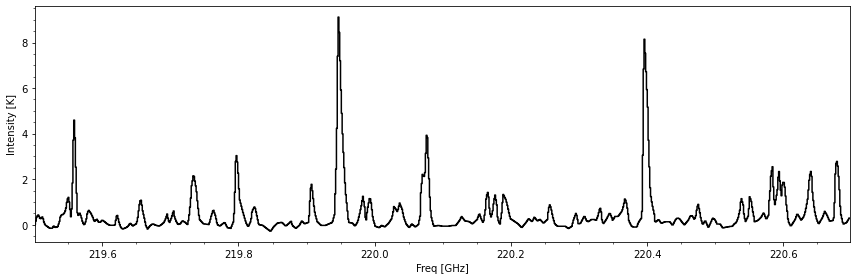

In [10]:
# TODO: Provide the location of the downloaded datafile here ("Protostar.csv")
# an example path might be: /Users/charles/Desktop/Astrochemistry_Activity/
dataPath = '' 

# Run the plotting function
X, Y = plotSpectra(dataPath, idLines=False)

What do you notice in this spectrum? What do you think all of the peaks are from?

Next, let's walk through the process of identifying the molecules associated with these spectra lines. Run the plotSpectra() function again, but now set idLines=True, which will replot the spectrum with shadings around certain lines of interest.

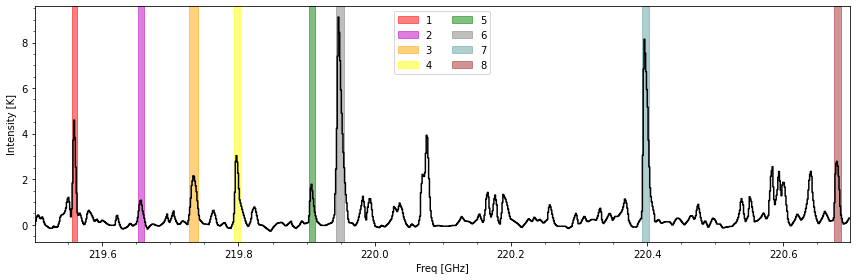

In [11]:
# Re-plot the spectra with shaded lines
plotSpectra(dataPath, idLines=True);

By looking at this plot and using your cursor, go ahead and write down the central frequency for each line in GHz (it doesn't have to be exact, just try to get close). This is important, as the next step is trying to match up these frequencies with a cataloge of known reference frequencies.

In [13]:
# TODO: By inspecting the spectrum, record the observed frequencies in GHz of each spectra line to be identified
observedFreq1 = 219.55
observedFreq2 = 219.65
observedFreq3 = 219.75

Using Python, now we can identify all of these molecules in the same way that professional astrochemists do. The process is relatively simple: we must compare the observed frequencies (observedFreq1, observedFreq2,...) against a list of known frequencies (which have been measured in a lab and recorded in online catalogs). The list of known frequencies for this activity is included in the lineList.csv file.

The goal then is to write a function called idLine that takes the observed frequency and the lineList data and returns the identity of the molecule. To do this, here's a few helpful hints:

1. You will want to find the molecule in lineList with the closest frequency to the observed frequency. One way to do this is to use a loop and calculate the difference between the observed frequency and all other reference frequencies in lineList.csv. Then after doing this, you should then choose the one with the smallest difference in frequency as the identified molecule.
2. Some molecules are responsible for multiple spectral lines, so don't be alarmed if you find that a few of the lines are coming from the same molecule.
3. And a quick coding hint: you may need to use the built-in function abs() which takes a number as an input and returns its absolute value.

In [25]:
# Load in the lineList
molecules = np.genfromtxt(dataPath+'lineList.csv', delimiter=',', usecols=0, dtype=str)
freqs     = np.genfromtxt(dataPath+'lineList.csv', delimiter=',', usecols=1, dtype=float)

# TODO: Print out the contents of the lineList - it's organized as two lists: molecules and frequencies in GHz.
print(molecules, freqs)       # all contents of both lists
print(molecules[0], freqs[0]) # get the moelcule name and frequency of the first element in the file

['CH2CHCN   ' 'NH2CN     ' 'c-H2COCH2 ' 'C18O      ' 'HNCO      '
 'C15N      ' 'C15N      ' 'HNCO      ' 'HNCO      ' 'HNCO      '
 'H213CO    ' 'C15N      ' 'C15N      ' 'SO        ' 't-HCOOH   '
 'H2CCO     ' '13CO      ' 'CH313CN   ' 'CH2CHCN   ' 'CH313CN   '
 'HNCO      ' 't-CH3CH2OH' 'CH313CN   ' 'CH313CN   ' 'CH313CN   '
 'CH3CN     ' 'SiC2      '] [219.4005788 219.4415988 219.5132442 219.5603541 219.6567695 219.7087429
 219.7224877 219.73385   219.737193  219.798274  219.908525  219.93404
 219.93482   219.949442  220.0379671 220.177569  220.3986195 220.5323273
 220.5613902 220.5703728 220.584751  220.601927  220.6211362 220.6338335
 220.6380665 220.6792869 220.7736886]
CH2CHCN    219.4005788


In [31]:
# TODO: Write a function called idLine to automatically ID spectra lines
# It should take an observedFreq (from the spectrum) and molecules and freqs (from the reference file) 
# and it should return the name of the identified molecules as a string
import math


i = 0

# idLine function here....
def idLine(observed):
    diff_list = []
    molecule_list = []
    for true_freq in freqs:
        diff = abs(observed - true_freq)
        diff_list.append(diff)

        molecule = molecules[i]
        molecule_list.append(molecule)
        print(f'The difference is {diff} for {molecule}')
        i += 1
    print(str(diff_list))
    print(str(molecule_list))   

idLine(observedFreq1)
    

UnboundLocalError: local variable 'i' referenced before assignment

Now, try your new function out to identify the spectral lines:

In [ ]:
# TODO: Use idLine to find the identities of each molecule in the spectrum

print('Molecule 1 is:', idLine(observedFreq1, molecules, freqs))
print('Molecule 2 is:', idLine(observedFreq2, molecules, freqs))

After completing this, you have now successfully identified molecules from real observational data!

__Protoplanetary Disks and Gas Temperatures:__

The next activity involves using molecular lines to infer something about the structure of protoplanetary disks, which are the gas- and dust-rich disks around protostars. They are the sites of planet formation and as a result, are of great interest to astrochemists as their chemical composition may hold important clues for questions about the origins of life as well as possible life outside of our solar system.

An important first step is get an idea of the radial temperature structure of a typical protoplanetary disk, as molecules can only survive at certain temperatures. The typical temperature structure as a function of radius from the central protostar is given by:

$T(r, q, T_{100}) = T_{100} \times \left( \dfrac{r}{100~\rm{au}} \right)^{-q}$

To investigate this temperature profile, write a function diskTemp() which takes radius in au (the average distance from the Earth to the Sun) and values for $T_{100}$ and q. You can assume a typical value of $T_{100}=27$ K and $q=0.43$ (which are both real values recently measured for the GM Aur disk).

In [ ]:
# TODO: Write a function diskTemp() which takes a radius and T_100 and q value and returns a temperature in K

# diskTemp function here....

After you have written this function, use the provided plotting function plotDiskTemp() to check out what this temperature profile looks like. What do you notice? Does the temperature increase or decrease with radius? Does this make sense to you?

In [ ]:
# Set parameters for temp. profile
T100 = 27
q    = 0.43

# Helper plotting function
def plotDiskTemp(T100, q):   
    plt.figure(figsize=(8, 6))
    radius = np.linspace(0, 600, 1000)
    plt.plot(radius, diskTemp(radius, T100, q), lw=2.0, c='k',
             label='Protoplanetary Disk Temperature')
    plt.legend(loc='upper right', frameon=False)
    plt.xlabel('Radius [au]')
    plt.ylabel('Temperature [K]')
    plt.xlim([-2, 600])
    plt.minorticks_on()
    plt.tight_layout()
    
    return None

# Make the plot
plotDiskTemp(T100, q)

__Where is HCN Gas in Disks?__

We now want to consider the hydrogen cyanide (HCN) molecule. Despite it being an extremely poisonous compound, it is one of the simplest nitriles, or those molecules with a carbon-nitrogen triple bond. This triple bond is known to be of prebiotic importance and may have been a crucial ingredient that helped jumpstart life on the primodrial Earth. 

If planet are expected to form in the innermost regions of protoplanetary disks at radii of $<100$ au, then we want to know if HCN gas can survive at the high temperatures in these inner regions. Astrochemists have found that HCN gas is found to be most abundant at a temperature of 30 K (and that HCN is destroyed above this temperature and inefficiently formed below that temperature).

To answer this question, we want to find out at what radius is the temperature approximately equal to 30 K by using your diskTemp() function:

In [ ]:
# TODO: Find at what radius is the temperature equal to 30 K 



In [ ]:


some_list = [2, 5, 10, 17]

10 in some_list


What did you find? Can HCN gas exist in the region ($<100$ au) where planets are currently-forming? If so, what are the implications?